# The Analysis of Students Performance in Exams

In [107]:
import pandas as pd
import numpy as np
from numpy import percentile
from numpy.random import seed
from sqlalchemy import create_engine
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Here we will work with the Students Performance in Exams dataset from Kaggle. 

In [108]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df0 = pd.read_sql_query('select * from studentsperformance', con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

## Explore the data

In [109]:
nRow, nCol = df0.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 8 columns


In [110]:
df0[~np.isfinite(df0['math score'])]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [111]:
# Numerical describe
df_stat = df0.describe(include = [np.number]) 
df_stat.loc['dtype'] = df0.dtypes
df_stat.loc['size'] = len(df0)
df_stat.loc['% null'] = df0.isnull().mean().round(2)
df_stat

,math score,reading score,writing score
count,1000,1000,1000
mean,66.089,69.169,68.054
std,15.1631,14.6002,15.1957
min,0,17,10
25%,57,59,57.75
50%,66,70,69
75%,77,79,79
max,100,100,100
dtype,int64,int64,int64
size,1000,1000,1000


In [114]:
# Non-numerical describe
df_stat = df0.describe(include = ['O']) 
df_stat.loc['dtype'] = df0.dtypes
df_stat.loc['size'] = len(df0)
df_stat.loc['% null'] = df0.isnull().mean().round(2)
df_stat

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642
dtype,object,object,object,object,object
size,1000,1000,1000,1000,1000
% null,0,0,0,0,0


## Explore and fix any outliers

<function matplotlib.pyplot.show(*args, **kw)>

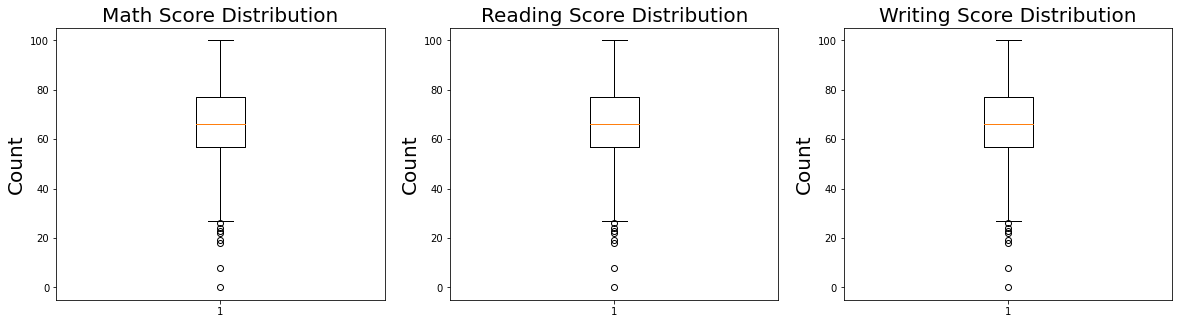

In [115]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
plt.boxplot(x=df0["math score"])
plt.ylabel("Count", size=20)
plt.title("Math Score Distribution", size=20)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 16)

plt.subplot(1,3,2)
plt.boxplot(x=df0["math score"])
plt.ylabel("Count", size=20)
plt.title("Reading Score Distribution", size=20)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 16)

plt.subplot(1,3,3)
plt.boxplot(x=df0["math score"])
plt.ylabel("Count", size=20)
plt.title("Writing Score Distribution", size=20)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 16)

plt.show

## Basic Summaries

#### Quartile: An observed value at a point that aids in splitting the ordered data sample into four equally sized parts. 

#### Median or 2nd quartile: The middle value in the sample, also called the 50th percentile or the 2nd quartile splits the ordered data sample into two
#### 1st and 3rd quartiles split each of median/2nd quartile halves into quarters. 
#### A percentile is an observed value at a point that aids in splitting the ordered data sample into 100 equally sized portions. Quartiles are often also expressed as percentiles.
#### 1st Quartile: The 25th percentile.
#### 3rd Quartile: The 75th percentile.
#### Minimum: The smallest observation in the sample.
#### Maximum: The largest observation in the sample.

In [116]:
q25, q50, q75 = np.percentile(df0["math score"], [25, 50, 75])
# calculate min/max
data_min, data_max = df0["math score"].min(), df0["math score"].max()


print('Min: %.3f' % data_min)
print('Q1: %.3f' % q25)
print('Median: %.3f' % q50)
print('Q3: %.3f' % q75)
print('Max: %.3f' % data_max)

Min: 0.000
Q1: 57.000
Median: 66.000
Q3: 77.000
Max: 100.000


## Z-score

### One statistic used to detect the outliers in a variable is the Z-score. To calculate Z-scores, we will first scale the variable so that its mean is 0 and its standard deviation is 1. Then we can measure how far a value is far away from the mean (0) in terms of standard deviations (1). The bigger the Z-score of a value, the farther it is from the mean, and the more likely it is an outlier. However, we still need to set a threshold for what Z-score constitutes an outlier.

In [117]:
z_scores = zscore(df0["math score"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([  2,   6,  16,  34,  49,  53,  56, 102, 104, 106, 114, 115, 121,
       122, 124, 125, 128, 130, 132, 144, 146, 149, 160, 165, 171, 179,
       206, 214, 215, 216, 221, 223, 229, 233, 234, 239, 245, 246, 263,
       268, 274, 275, 276, 286, 288, 291, 299, 306, 317, 325, 328, 333,
       334, 349, 361, 370, 373, 377, 381, 397, 403, 407, 409, 411, 415,
       420, 426, 439, 447, 451, 458, 465, 469, 470, 474, 492, 501, 503,
       505, 509, 521, 538, 539, 543, 546, 551, 563, 567, 572, 595, 605,
       607, 613, 615, 618, 619, 624, 626, 635, 638, 652, 659, 685, 686,
       689, 702, 708, 710, 712, 717, 719, 732, 736, 749, 755, 779, 784,
       793, 802, 803, 808, 813, 815, 820, 845, 846, 852, 853, 855, 859,
       864, 865, 872, 873, 886, 890, 891, 893, 900, 903, 905, 916, 919,
       934, 938, 946, 950, 956, 957, 962, 970, 979, 990, 995], dtype=int64),)
Number of outliers is: 154
The score threshold is: 2
The indices of the ou

## Scores distribution

<function matplotlib.pyplot.show(*args, **kw)>

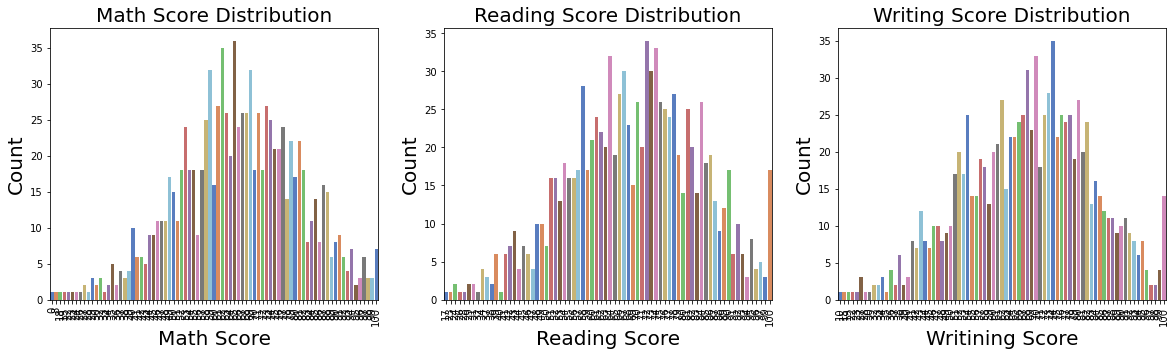

In [118]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
p = sns.countplot(x="math score", data = df0, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 
plt.xlabel("Math Score", size=20)
plt.ylabel("Count", size=20)
plt.title("Math Score Distribution", size=20)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 16)

plt.subplot(1,3,2)
p = sns.countplot(x="reading score", data = df0, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 
plt.xlabel("Reading Score", size=20)
plt.ylabel("Count", size=20)
plt.title("Reading Score Distribution", size=20)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 16)

plt.subplot(1,3,3)
p = sns.countplot(x="writing score", data = df0, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 
plt.xlabel("Writining Score", size=20)
plt.ylabel("Count", size=20)
plt.title("Writing Score Distribution", size=20)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 16)

plt.show

## The histograms above resemble the normal distribution but not quite normally distribted. 

## Look at the same distributions transformed with the log

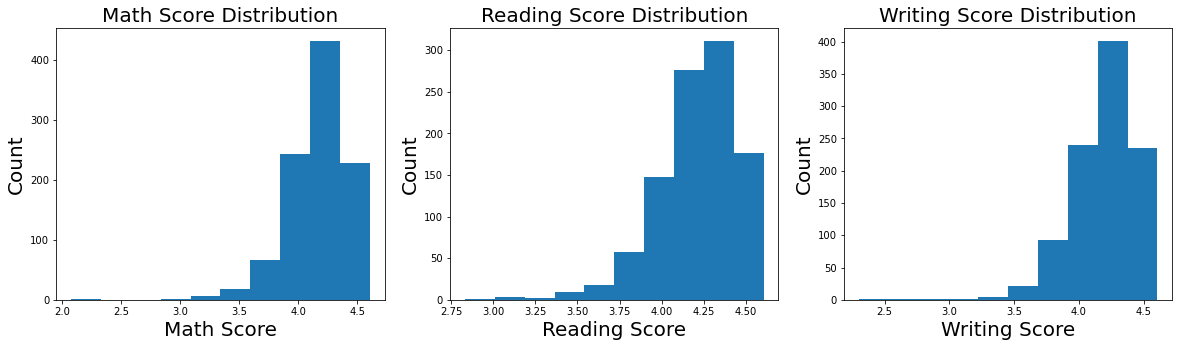

In [119]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
plt.hist(np.log(df0[df0["math score"] != 0]['math score']))
_ = plt.setp(p.get_xticklabels(), rotation=90) 
plt.xlabel("Math Score", size=20)
plt.ylabel("Count", size=20)
plt.title("Math Score Distribution", size=20)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 16)

plt.subplot(1,3,2)
plt.hist(np.log(df0[df0["reading score"] != 0]['reading score']))
_ = plt.setp(p.get_xticklabels(), rotation=90) 
plt.xlabel("Reading Score", size=20)
plt.ylabel("Count", size=20)
plt.title("Reading Score Distribution", size=20)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 16)

plt.subplot(1,3,3)
plt.hist(np.log(df0[df0["writing score"] != 0]['writing score']))
_ = plt.setp(p.get_xticklabels(), rotation=90) 
plt.xlabel("Writing Score", size=20)
plt.ylabel("Count", size=20)
plt.title("Writing Score Distribution", size=20)
plt.tick_params(axis = 'both', which = 'minor', labelsize = 16)

# plt.show

# 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

## Use Jarque-Bera and Normal test 

In [120]:
# To avoid log error for zero values we filter those aways 
jb_stats = jarque_bera(np.log(df0[df0["math score"] != 0]['math score']))
norm_stats = normaltest(np.log(df0[df0["math score"] != 0]['math score']))
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
print('--------------------------------')
jb_stats = jarque_bera(np.log(df0["reading score"]))
norm_stats = normaltest(np.log(df0["reading score"]))
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))
print('--------------------------------')
jb_stats = jarque_bera(np.log(df0["writing score"]))
norm_stats = normaltest(np.log(df0["writing score"]))
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1733.5739738520158 and p value is 0.0
Normality test statistics is 335.09113813231846 and p value is 1.7214082785301018e-73
--------------------------------
Jarque-Bera test statistics is 495.1273179446674 and p value is 0.0
Normality test statistics is 209.7715093472919 and p value is 2.8099300901335873e-46
--------------------------------
Jarque-Bera test statistics is 1410.937006925743 and p value is 0.0
Normality test statistics is 318.9692123027676 and p value is 5.454005856377552e-70


### The p-values are 0 which indicates that the distribution of the log transformed variables is statistically different from the normal distribution. However, these transformations might still be useful. In general, we prefer to work with 2 tails distributions that "look" normal with values clustered around the mean.

## We will use Box-Cox transformation for making these scores normally distributed.

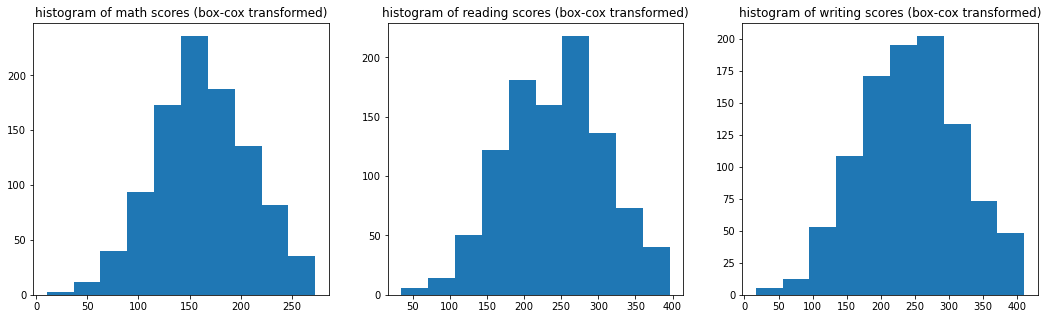

In [121]:
math_boxcox,_ = boxcox(df0[df0['math score']>0]['math score'])
reading_boxcox,_ = boxcox(df0["reading score"])
writing_boxcox,_ = boxcox(df0["writing score"])

plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(1, 3, 1)
plt.hist(math_boxcox)
plt.title("histogram of math scores (box-cox transformed)")
plt.subplot(1, 3, 2)
plt.hist(reading_boxcox)
plt.title("histogram of reading scores (box-cox transformed)")
plt.subplot(1, 3, 3)
plt.hist(writing_boxcox)
plt.title("histogram of writing scores (box-cox transformed)")
plt.show()

## After using Box-Cox normalization we can use Jarque Bera to test if they are now normal

In [122]:
# To avoid log error for zero values we filter those aways 
jb_stats = jarque_bera(math_boxcox)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print('--------------------------------')
jb_stats = jarque_bera(reading_boxcox)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print('--------------------------------')
jb_stats = jarque_bera(writing_boxcox)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))


Jarque-Bera test statistics is 1.7200982636836308 and p value is 0.42314129209599327
--------------------------------
Jarque-Bera test statistics is 4.119778573559666 and p value is 0.127468081515408
--------------------------------
Jarque-Bera test statistics is 4.746478090042761 and p value is 0.09317842784043195


### The p-values are larger than 5% which indicates that these distribution are statistically not different from the normal distribution. 

# 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

In [123]:
df0['weighted average'] = (df0['math score'] + df0['reading score'] + df0['writing score']) / 3

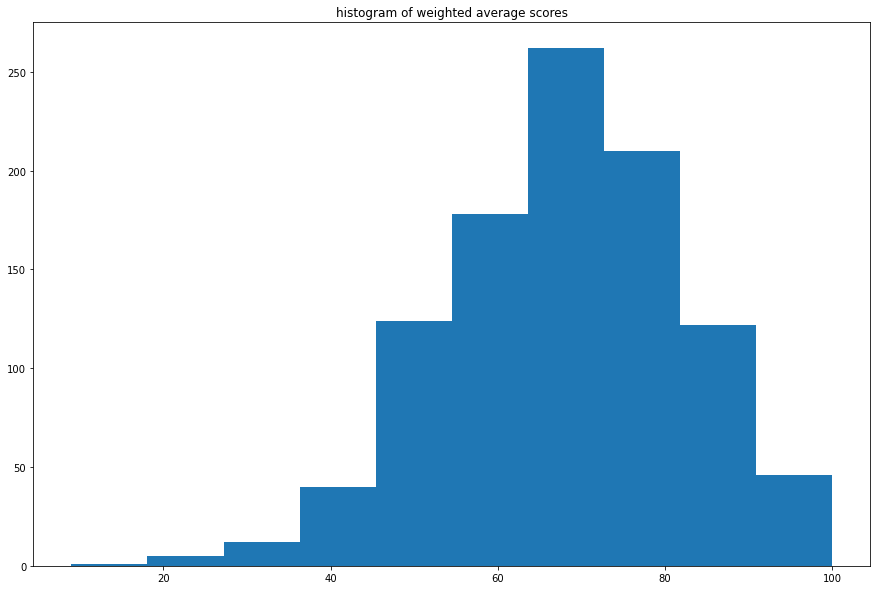

In [124]:
plt.figure(figsize=(15,10))
plt.hist(df0['weighted average'])
plt.title("histogram of weighted average scores")
plt.show()

In [125]:
jb_stats = jarque_bera(df0['weighted average'])
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print('--------------------------------')


Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
--------------------------------


### The weighted average score is not normally distributed and will use Box-Cox to make it normally distributed

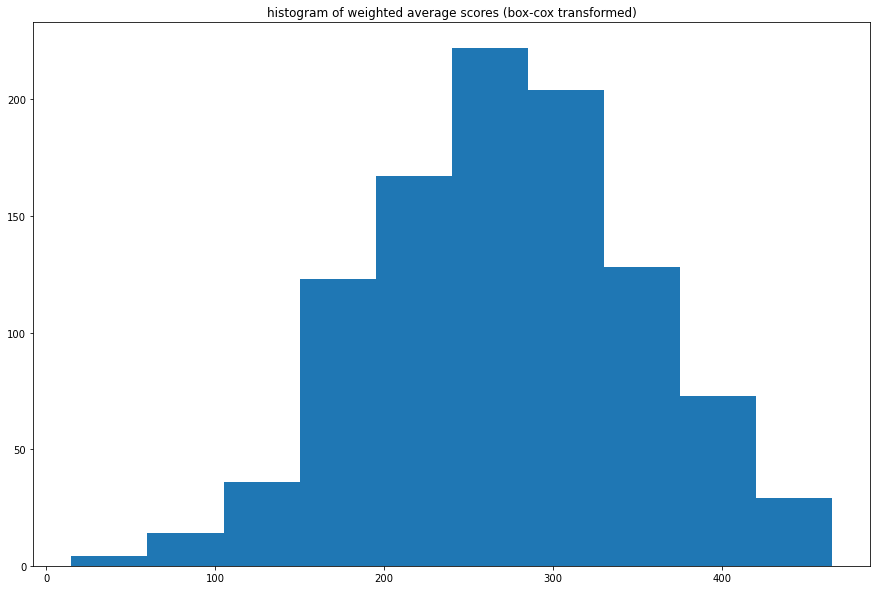

In [126]:
weighted_average_boxcox,_ = boxcox(df0['weighted average'])
plt.figure(figsize=(15,10))
# histograms of the box-cox transformed data
plt.hist(weighted_average_boxcox)
plt.title("histogram of weighted average scores (box-cox transformed)")
plt.show()

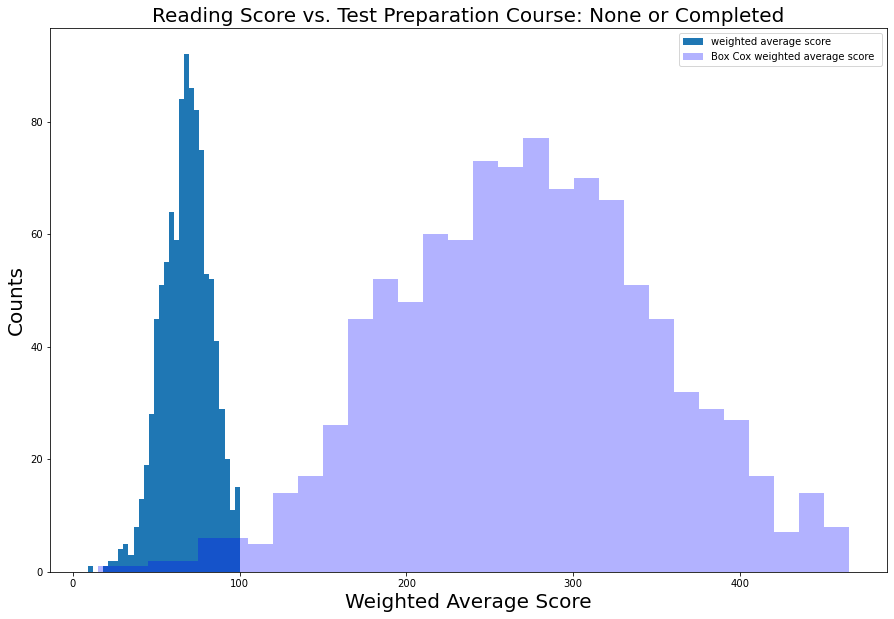

In [127]:
plt.figure(figsize=(15,10))
plt.hist(df0['weighted average'],bins=30,label='weighted average score')
plt.hist(weighted_average_boxcox,bins=30,alpha=0.3,color='blue',label='Box Cox weighted average score ')
plt.legend()
plt.xlabel('Weighted Average Score', size=20)
plt.ylabel('Counts', size=20)
plt.title("Reading Score vs. Test Preparation Course: None or Completed", size=20)
plt.show()

# Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [134]:
df0['weighted_average_boxcox'] = weighted_average_boxcox.tolist()

In [136]:
df0.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,weighted average,weighted_average_boxcox
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,296.595217
1,female,group C,some college,standard,completed,69,90,88,82.333333,353.784556
2,female,group B,master's degree,standard,none,90,95,93,92.666667,418.027507


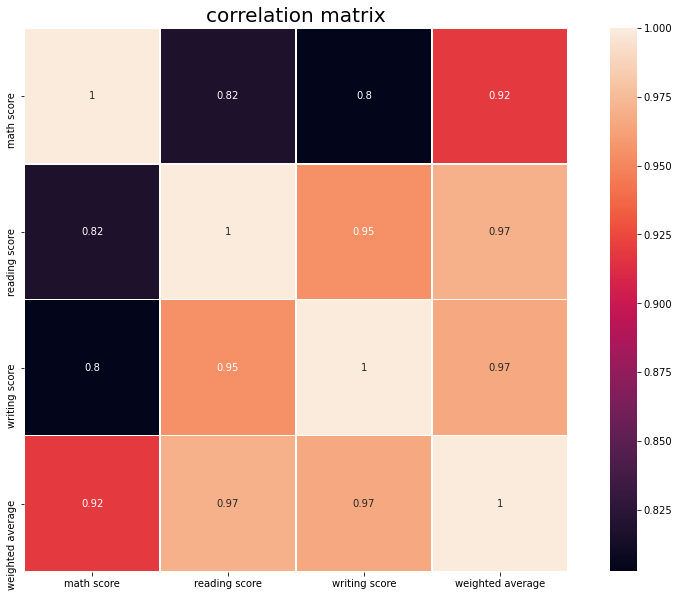

In [128]:
# make the correlation matrices.
corrmat_scores = df0.corr()

# heatmaps are a great way to get 
# a quick visual read on a big correlation matrix.

plt.figure(figsize=(15,10))
# draw the heatmap using seaborn.
sns.heatmap(corrmat_scores, square=True, annot=True, linewidths=.5) #, label='small')
plt.title("correlation matrix", size=20)
plt.show()

## Weighted average has highest correlation 

In [143]:
# Test whether group differences are significant.
categories = df0["parental level of education"].unique()
grouped_df = df0.groupby("parental level of education")
for var in ["weighted_average_boxcox"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(categories)):
        for j in range(i+1, len(categories)):
            print("t-test between {0} and {1}:".format(categories[i], categories[j]))
            print(stats.ttest_ind(
                df0[df0["parental level of education"]==categories[i]][var], 
                df0[df0["parental level of education"]==categories[j]][var]
            ))

------------------------------------------------
Comparisons for variable: weighted_average_boxcox
------------------------------------------------
t-test between bachelor's degree and some college:
Ttest_indResult(statistic=2.2325355561613427, pvalue=0.02622648688454221)
t-test between bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.7470650763380539, pvalue=0.45602683982004644)
t-test between bachelor's degree and associate's degree:
Ttest_indResult(statistic=1.5181180271993509, pvalue=0.12991940648498326)
t-test between bachelor's degree and high school:
Ttest_indResult(statistic=5.639088505904971, pvalue=3.831267453960282e-08)
t-test between bachelor's degree and some high school:
Ttest_indResult(statistic=3.9604314901094235, pvalue=9.385411410507653e-05)
t-test between some college and master's degree:
Ttest_indResult(statistic=-2.6018995284895596, pvalue=0.009758876213380714)
t-test between some college and associate's degree:
Ttest_indResult(statistic=-0.84230

In [142]:
# Test whether group differences are significant.
categories = df0["gender"].unique()
grouped_df = df0.groupby("gender")
for var in ["weighted_average_boxcox"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(categories)):
        for j in range(i+1, len(categories)):
            print("t-test between {0} and {1}:".format(categories[i], categories[j]))
            print(stats.ttest_ind(
                df0[df0["gender"]==categories[i]][var], 
                df0[df0["gender"]==categories[j]][var]
            ))

------------------------------------------------
Comparisons for variable: weighted_average_boxcox
------------------------------------------------
t-test between female and male:
Ttest_indResult(statistic=4.316845509684089, pvalue=1.74048262157193e-05)


In [141]:
# Test whether group differences are significant.
categories = df0["lunch"].unique()
grouped_df = df0.groupby("lunch")
for var in ["weighted_average_boxcox"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(categories)):
        for j in range(i+1, len(categories)):
            print("t-test between {0} and {1}:".format(categories[i], categories[j]))
            print(stats.ttest_ind(
                df0[df0["lunch"]==categories[i]][var], 
                df0[df0["lunch"]==categories[j]][var]
            ))

------------------------------------------------
Comparisons for variable: weighted_average_boxcox
------------------------------------------------
t-test between standard and free/reduced:
Ttest_indResult(statistic=9.472553929697188, pvalue=1.912528261943329e-20)


In [140]:
# Test whether group differences are significant.
categories = df0["test preparation course"].unique()
grouped_df = df0.groupby("test preparation course")
for var in ["weighted_average_boxcox"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(categories)):
        for j in range(i+1, len(categories)):
            print("t-test between {0} and {1}:".format(categories[i], categories[j]))
            print(stats.ttest_ind(
                df0[df0["test preparation course"]==categories[i]][var], 
                df0[df0["test preparation course"]==categories[j]][var]
            ))

------------------------------------------------
Comparisons for variable: weighted_average_boxcox
------------------------------------------------
t-test between none and completed:
Ttest_indResult(statistic=-8.439033139502564, pvalue=1.1138872313352914e-16)


### In order to explain the determinants of success in exams we can use variables such as lunch, gender, test preparation course and parental level of educations. Ethnicity seems to be the least helpful determinant.